# Download Fresh Data

In [11]:
import warnings; warnings.simplefilter('ignore')
from utils import *
%matplotlib inline

In [2]:
!pocket-to-sqlite fetch "$(pwd)/data/pocket.db" #--silent "$(pwd)/data/pocket.db"

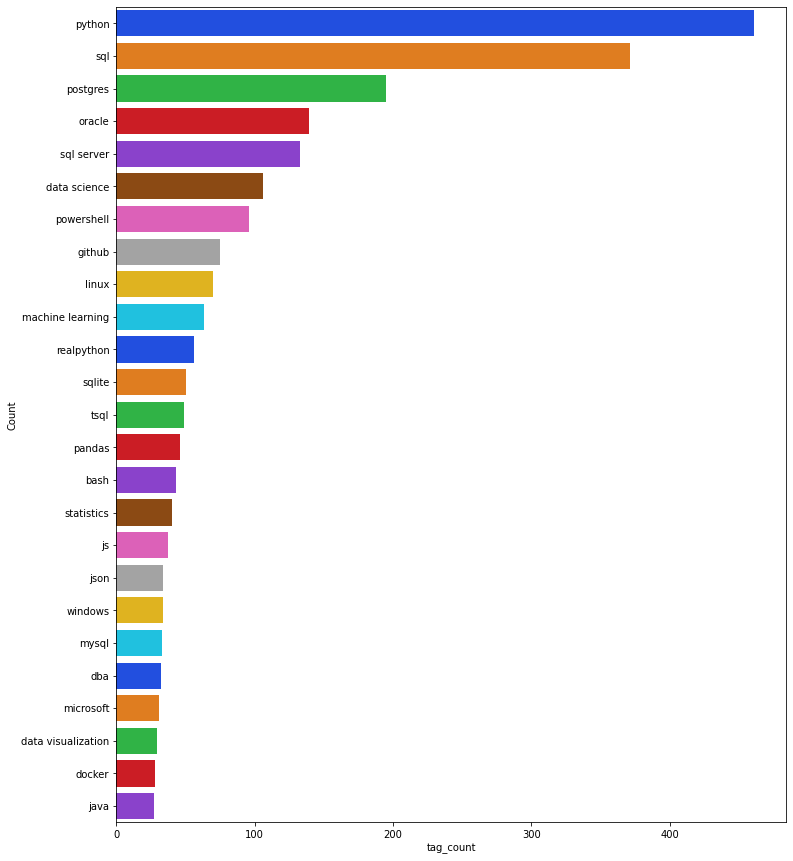

In [12]:
plot_tag_counts()

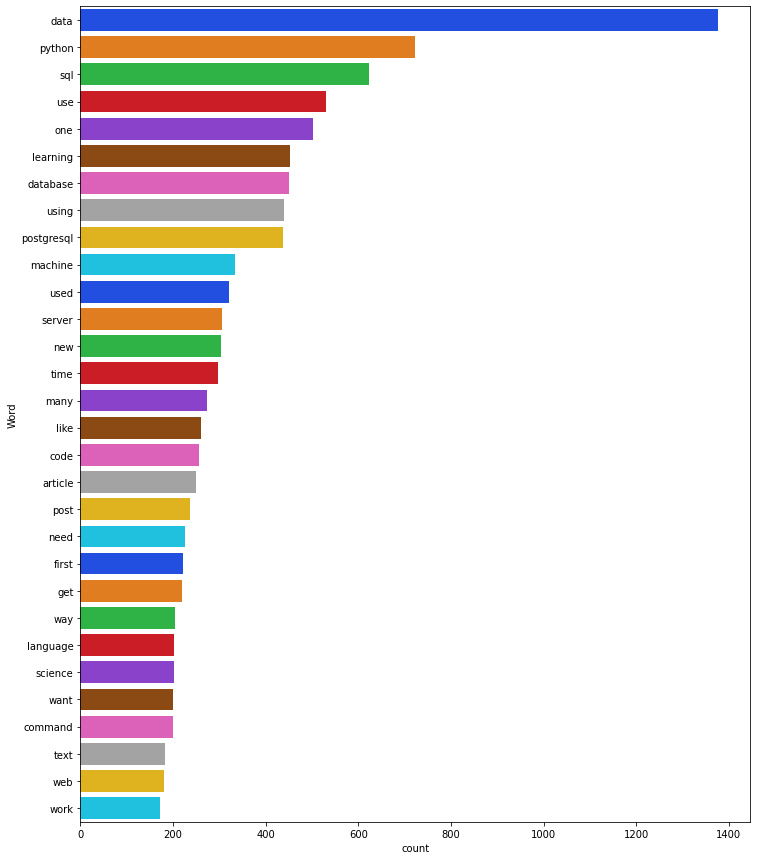

In [13]:
plot_word_frequencies()

In [14]:
%%time
df = get_articles_df(fetch_all=True)
tdf, all_tags = prep_dataframe(df, 'combined_text')

CPU times: user 7.16 s, sys: 466 ms, total: 7.63 s
Wall time: 7.76 s


# Train Models

In [15]:
%%time 
output_df = train_models(tdf, all_tags)

TFIDF
(2645, 2953)
(1304, 2953)
Modeling
class Name: node
[0]	valid-auc:0.50000
Total CV score is 0.5 for the label: "node"
class Name: fullstack
[0]	valid-auc:0.50000
Total CV score is 0.5 for the label: "fullstack"
class Name: dba
[33]	valid-auc:0.95758
Total CV score is 0.6525253333333333 for the label: "dba"
class Name: ios
[13]	valid-auc:0.94436
Total CV score is 0.725484 for the label: "ios"
class Name: terminal
[0]	valid-auc:0.50000
Total CV score is 0.6803872 for the label: "terminal"
class Name: cosmosdb
[1]	valid-auc:0.99924
Total CV score is 0.73353 for the label: "cosmosdb"
class Name: machine learning
[25]	valid-auc:0.92564
Total CV score is 0.7609745714285714 for the label: "machine learning"
class Name: statistics
[12]	valid-auc:0.90957
Total CV score is 0.7795495 for the label: "statistics"
class Name: apple
[12]	valid-auc:1.00000
Total CV score is 0.804044 for the label: "apple"
class Name: api
[12]	valid-auc:1.00000
Total CV score is 0.8236395999999999 for the label: 

In [16]:
output = pd.merge(left=pd.merge(left=output_df, 
         right=df[['item_id', 'combined_text', 'resolved_title','resolved_url', 'tags']], 
         how='left', on=['item_id']), right=tdf[['item_id', 'tag_list']], on=['item_id'])

del output['tags']
output.head()

,item_id,node,fullstack,dba,ios,terminal,cosmosdb,machine learning,statistics,apple,...,psych,mac,pg extensions,sql tuning,dataset,plv8,combined_text,resolved_title,resolved_url,tag_list
0,73981909,0.000294,0.000294,0.000663,0.000329,0.000294,0.000685,0.000256,0.000804,0.000545,...,0.000969,0.000236,0.000294,0.000294,0.000584,0.000294,every need pl sql prints something terminal traditional solution dbms output put line used probably know obstacles however absolute buffer size limit remains markus winand blog index html markus winand blog performance reliability maintainability scalability software quality quality life index h...,Pipelined Functions: Better Than DBMS_OUTPUT,http://blog.fatalmind.com/2009/11/11/pipelined-functions-better-then-dbms_output/,"[oracle, plsql, sql]"
1,2513311295,0.000294,0.000294,0.000165,0.000390,0.000294,0.001115,0.000256,0.000277,0.000792,...,0.000798,0.000145,0.000294,0.000294,0.000488,0.000294,jealous go developers building executable easily shipping users great users could run application without installing anything dream pyinstaller one way get python ecosystem real python static real python logo c edea svg start start learn python python tutorials depth articles tutorials video cou...,Using PyInstaller to Easily Distribute Python Applications,https://realpython.com/pyinstaller-python/,"[python, realpython]"
2,1978017352,0.000294,0.000294,0.003476,0.004186,0.000294,0.000771,0.000196,0.000662,0.000795,...,0.000621,0.000270,0.000294,0.000294,0.002779,0.000294,many entry level investors hedge funds shrouded mystery exclusivity forbidden nginx,What is a Hedge Fund?,http://www.visualcapitalist.com/what-is-a-hedge-fund/,[]
3,2984555302,0.000294,0.000294,0.000249,0.000333,0.000294,0.001874,0.000219,0.000377,0.000443,...,0.000831,0.000123,0.000294,0.000294,0.000480,0.000294,mongodb popular distributed document database offers replication via homegrown consensus protocol draws inspiration raft distribute data across shards via mongos previously evaluated mongodb versions rc jepsen analyses analyses talks talks consistency consistency services services ethics ethics ...,MongoDB 4.2.6,http://jepsen.io/analyses/mongodb-4.2.6,[]
4,2330673256,0.000294,0.000294,0.000953,0.000248,0.000294,0.001921,0.000413,0.001116,0.000349,...,0.000655,0.000136,0.000294,0.000294,0.000861,0.000294,azure database migration service supports migrations mongodb cosmos db mongo api sign preview capability azure cosmos db microsoft globally distributed multi model database service mission critical applications javascript void https gxcuf lithium com html assets content images globalheader micro...,Announcing Preview of MongoDB migrations to Cosmos DB Mongo API using Azure Database Migration Service,https://blogs.msdn.microsoft.com/datamigration/2018/09/21/annoucing-preview-of-mongodb-migrations-to-cosmosdb-mongo-api-using-azure-database-migration-service/,[]


# Predict New Tags

In [17]:
%%time
new_articles = get_articles_df(fetch_all=False)
prediction_df, all_tags = prep_dataframe(new_articles, 'combined_text')

CPU times: user 333 ms, sys: 124 ms, total: 457 ms
Wall time: 464 ms


In [18]:
new_article_output = predict_new(prediction_df)

TypeError: predict_new() missing 1 required positional argument: 'tags'

In [10]:
output = pd.merge(left=pd.merge(left=new_article_output, 
         right=new_articles[['item_id', 'combined_text', 'resolved_title','resolved_url', 'tags']], 
         how='left', on=['item_id']), right=prediction_df[['item_id', 'tag_list']], on=['item_id'])

del output['tags']
output.item_id.tolist()

[2874107333, 2218288050, 3029322438, 3028625337]